In [465]:
import tensorflow as tf

In [466]:
import os

In [467]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [468]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [469]:
len(gpus)

1

In [470]:
# Avoid OOM errors by setting Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [471]:
tf.config.list_physical_devices('GPU')

[]

In [472]:
#Remove dodgy images
import cv2
import imghdr


In [473]:
import os
from matplotlib import pyplot as plt

In [474]:
data_dir = 'data'

In [475]:
#Use of os
os.listdir(data_dir)

['happy', 'sad']

In [476]:
os.listdir(data_dir)

['happy', 'sad']

In [477]:
image_exts = ['jpeg','jpg','bmp','png']

In [478]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [479]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [480]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)


In [481]:
img = cv2.imread(os.path.join('data','happy','960x0.jpg'))

In [482]:
img.shape

(640, 960, 3)

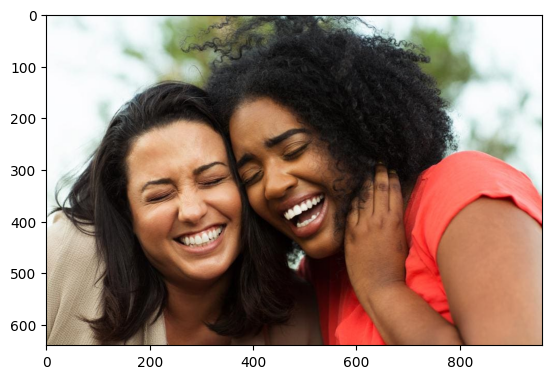

In [483]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [485]:
#Load data
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [486]:
import numpy as np
from matplotlib import pyplot as plt

In [487]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 136 files belonging to 2 classes.


In [488]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [489]:
len(batch)

2

In [490]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [491]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

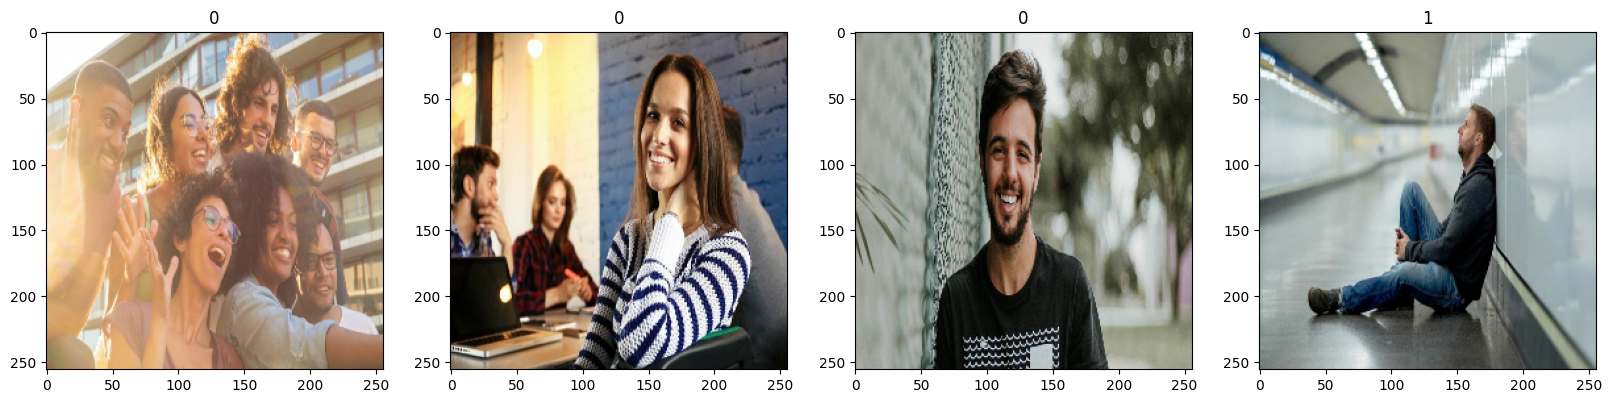

In [492]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [493]:
scaled = batch[0]/ 255

In [494]:
scaled.max()

1.0

In [495]:
#Preprocessing data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

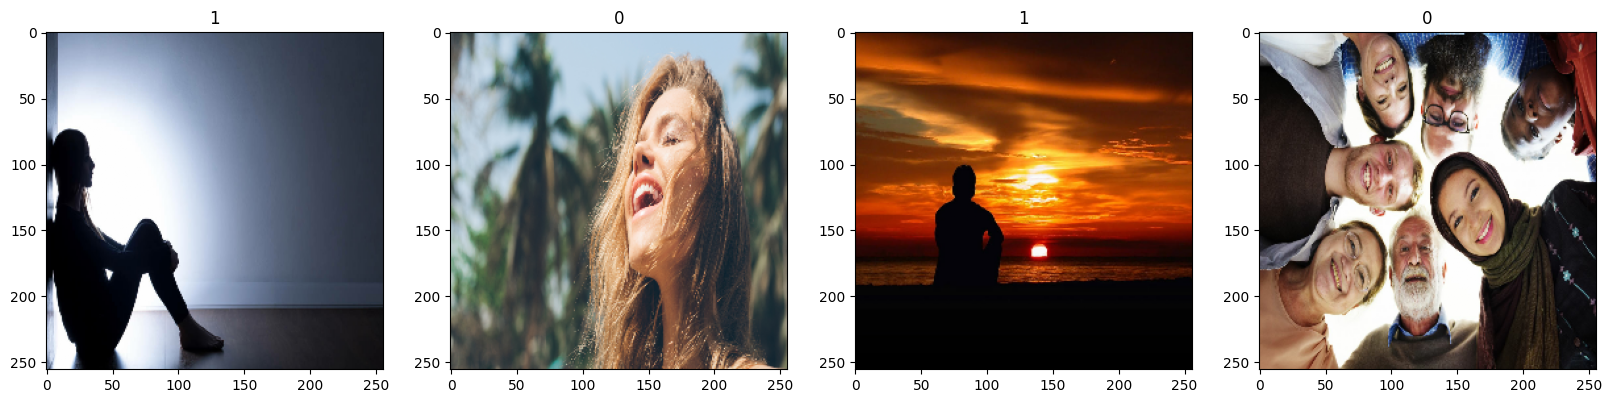

In [496]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [497]:
len(data)

5

In [498]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)


In [499]:
train_size

3

In [500]:
val_size

1

In [501]:
test_size

1

In [502]:
train_size + val_size + test_size 


5

In [503]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [504]:
len(train)

3

In [505]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [506]:
model = Sequential()

In [507]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [508]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [509]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [510]:
#Train
logdir = 'logs'

In [511]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.4219 - loss: 1.0952 - val_accuracy: 0.7188 - val_loss: 0.6301
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.7409 - loss: 0.5863 - val_accuracy: 0.9375 - val_loss: 0.5278
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.7539 - loss: 0.5662 - val_accuracy: 0.8438 - val_loss: 0.3497
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 0.7865 - loss: 0.4430 - val_accuracy: 0.7500 - val_loss: 0.4349
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.7357 - loss: 0.5331 - val_accuracy: 0.7812 - val_loss: 0.5120
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 545ms/step - accuracy: 0.8698 - loss: 0.4499 - val_accuracy: 0.8125 - val_loss: 0.4071
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - accuracy: 0.8216 - loss: 0.3868 - val_accuracy: 0.7812 - val_loss: 0.3937
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 0.8464 - loss: 0.3318 - val_accuracy: 0.8125 - val_loss: 0.4248
Epo

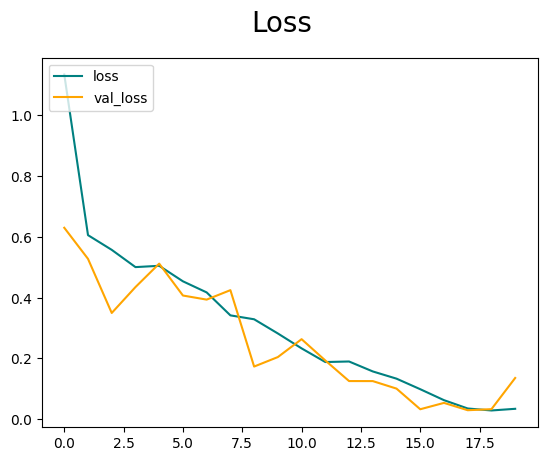

In [512]:
# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

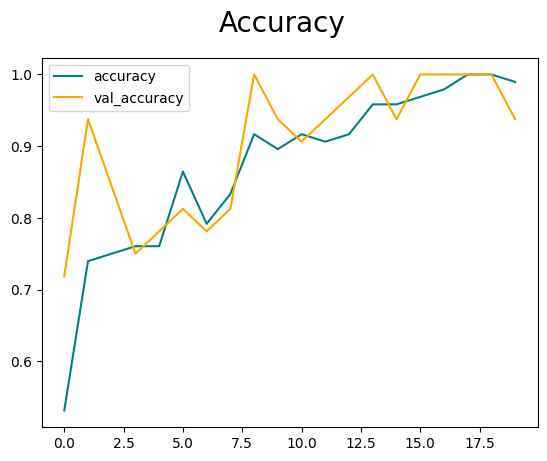

In [513]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [514]:
# Evaluate performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [515]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [516]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy}')

Precision:1.0, Recall:1.0,Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


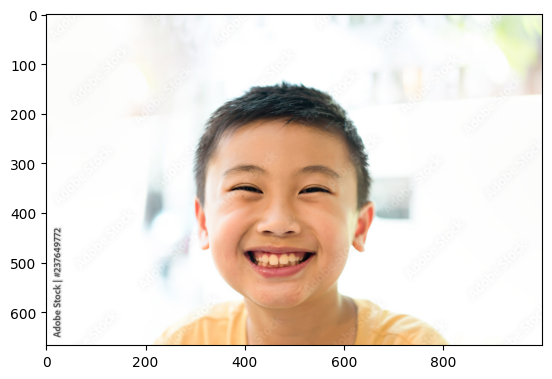

In [517]:
#Testing the Happy image
img = cv2.imread('Happy face.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

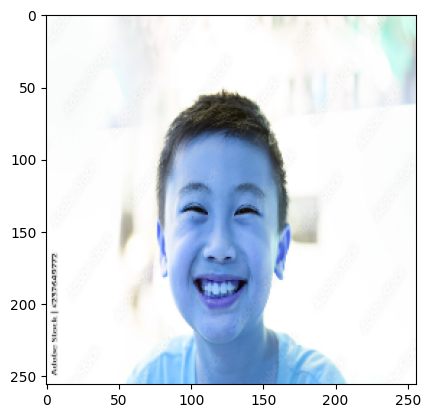

In [518]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [519]:
resize.shape

TensorShape([256, 256, 3])

In [520]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [521]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [522]:
yhat

array([[0.02652498]], dtype=float32)

In [523]:
#Output is 0. That means it is happy person face

In [524]:
if yhat> 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
